# Simple Linear Regression

<b>In this simple project, we will consider sales based on 'TV' marketing budget.</b>
<br><b>We will build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.</b>

<h3>Understanding the data.<h3>

<b>Let's start with following step:</b><br><br>
<b>1. Importing data using pandas library.</b><br>
<b>2. Understanding the structure of the data.</b>

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv("tvmarketing.csv")

<b>Let's check the structure the advertising dataset.</b>

In [3]:
# Display first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
# Let's check the shape of the DataFrame(rows,columns)
advertising.shape

(200, 2)

In [7]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualizing Data Using Seaborn

In [8]:
import seaborn as sns

%matplotlib inline

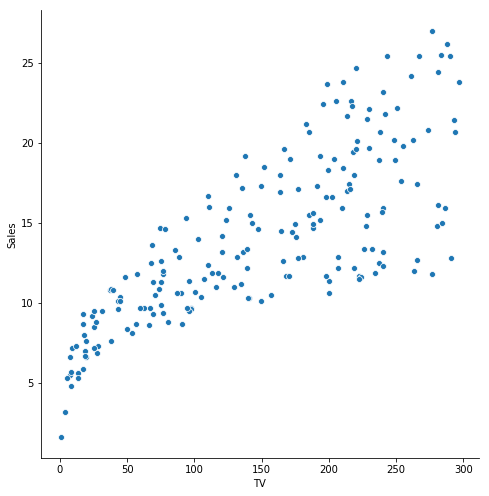

In [9]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(advertising,x_vars='TV',y_vars='Sales',height=7,aspect=1,kind="scatter")

# Performing Simple Linear Regression

### Equation of Linear Regression
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$ 

* y is the response 
* c is the intercept
* $m_1$ is the coefficient for the first feature
* $m_n$ is the coefficient for $n^{th}$ feature

#### In our case:
y = c + $m_1$ x TV

The $m$ values are called the model <b>coefficients</b> or <b>modal parameters.</b>

## Generic steps in Model Building using sklearn
The steps to build any model can be divided as follows:
## Preparing x and y
* The scikit-learn library expects x (feature variable) and y (response variable) to be numpy arrays.
* However, x can be a dataframe as Pandas is built over Numpy.


In [10]:
# Feature variable to x
x = advertising['TV']
# Print the first 5 rows
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
# Putting response variable to y
y = advertising["Sales"]
# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting data into Training and Testing Sets

In [12]:
# random_state is the seed used by the random number generator, it can be any integer
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
train_test_split 

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [16]:
# It is general convention in scikit-learn that observation are rows, while features are columns.
# This is needed only when you are using a single feature,in this case, TV.
import numpy as np
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


# Performing Linear Regression

In [18]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LimearRegression as lr
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Coefficients Calculation

In [19]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


y = 6.989 + 0.0464 X TV <br>
Now, Let's use this equation to predict our sales

# Predictions

In [20]:
# Making predictions on the testing set
y_pred = lr.predict(x_test)

In [21]:
type(y_pred)

numpy.ndarray

# Computing RMSE and $R^2$ values

Text(0, 0.5, 'Sales')

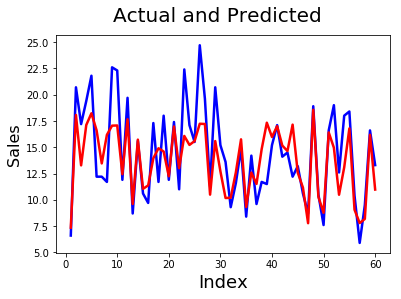

In [22]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)] #generating index
fig = plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred,color="red",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20) # Plot Heading
plt.xlabel('Index',fontsize=18) # X-label
plt.ylabel('Sales',fontsize=16) # Y-label

Text(0, 0.5, 'ytest-ypred')

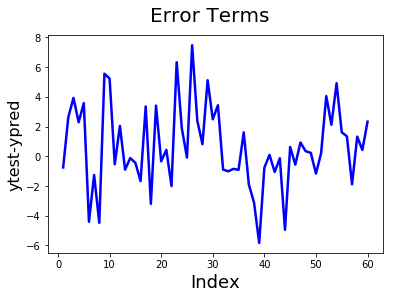

In [23]:
# Error Terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('ytest-ypred',fontsize=16)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [25]:
r_squared = r2_score(y_test,y_pred)

In [27]:
print("Mean_Squared_Error :",mse)
print("r_square_value :",r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

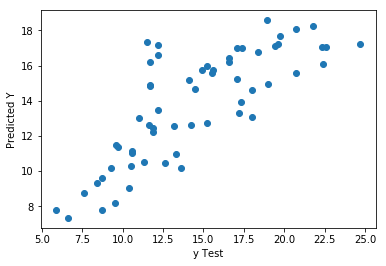

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('y Test')
plt.ylabel('Predicted Y')